In [2]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt 

%matplotlib inline 

import warnings  
warnings.filterwarnings("ignore")

In [3]:
# Reading data

train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train_original=train.copy()
test.original=test.copy()

# Understanding the Data

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape  ,  test.shape


((614, 13), (367, 12))

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Univariate Analysis

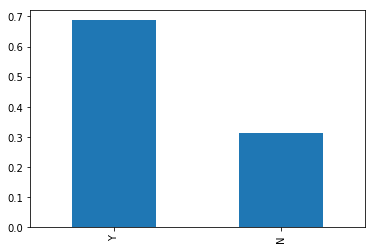

In [8]:
#Loan_Status (Target_Variable)

train["Loan_Status"].value_counts(normalize="true").plot.bar()
plt.show()

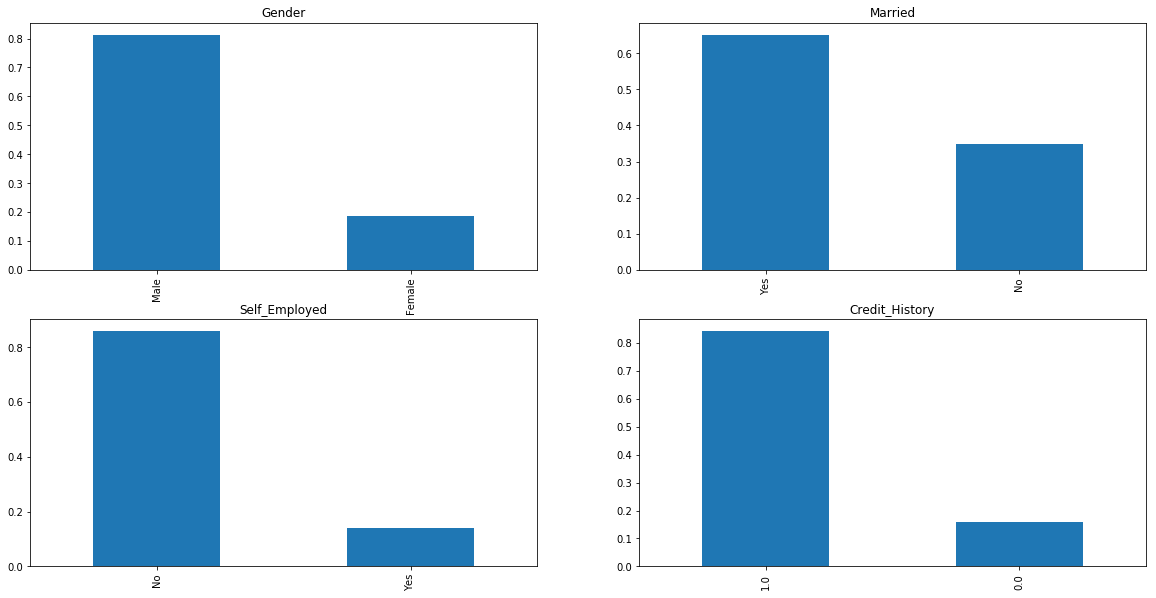

In [9]:
#Independent Variable (Categorical) 

plt.figure(1) 

plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

plt.show()

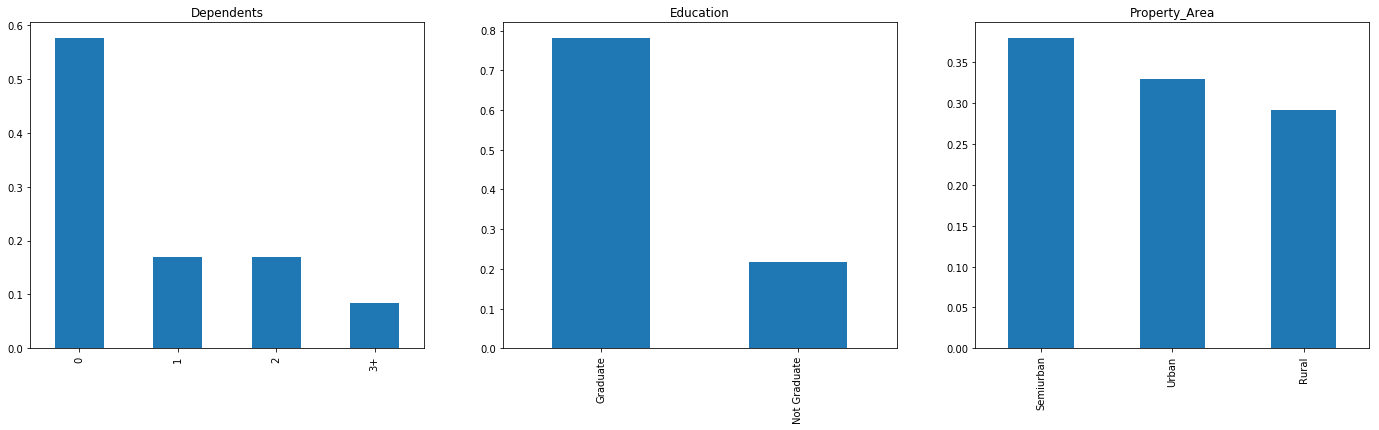

In [10]:
#Independent Variable (Ordinal)

plt.figure(1) 

plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

plt.show()

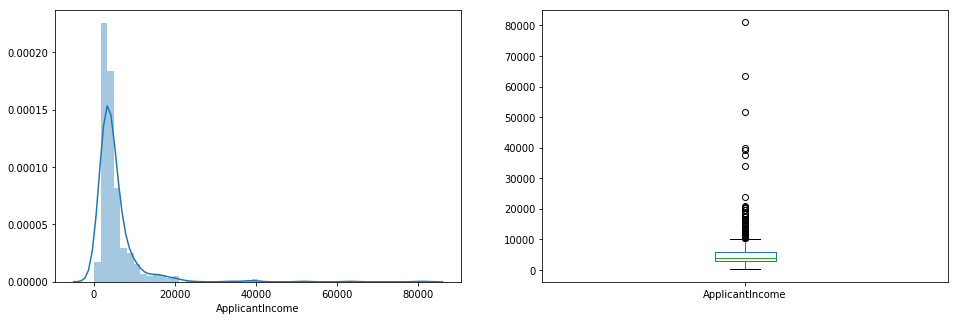

In [11]:
#Numerical_Variable (ApplicantIncome)

plt.figure(1)

plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

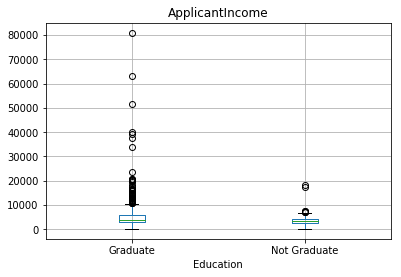

In [12]:
#ApplicantIncome_by_Education

train.boxplot(column='ApplicantIncome', by = 'Education'),
plt.suptitle("")

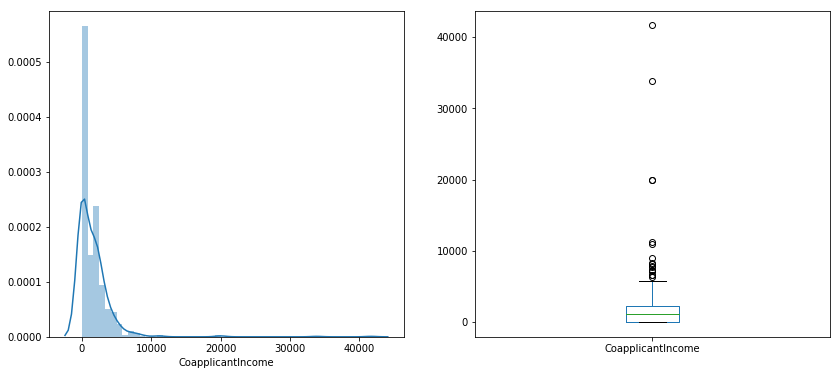

In [13]:
#Numerical_Variable (CoapplicantIncome)

plt.figure(1)

plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(14,6))

plt.show()

In [14]:
train['CoapplicantIncome'].quantile([0,0.25,0.50,0.75,1])

0.00        0.00
0.25        0.00
0.50     1188.50
0.75     2297.25
1.00    41667.00
Name: CoapplicantIncome, dtype: float64

In [16]:
train.groupby('CoapplicantIncome').size() # Not a good idea to groupby on a non-categorical data

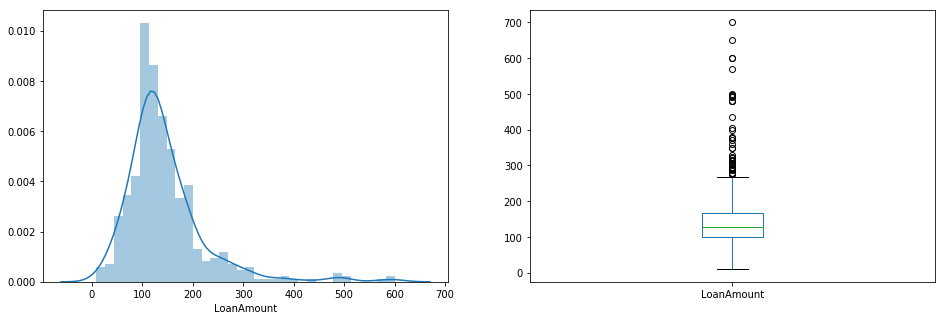

In [17]:
#Numerical_Variable (LoanAmount)

plt.figure(1)

plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']); 

plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 

plt.show()